<a href="https://colab.research.google.com/github/SYongho/MY/blob/10-Inputs/10inputs_LH_PG_MLP_%EB%AA%A8%EB%91%90_Normalize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
ALL = pd.read_csv('ALL.csv')
ALL

,GLDataID,PhaseID,AuthorsGL,YearMeasuredGL,SystPressureGL,SystTempGL/C,PipeDiaGL,PipeRoughGL,PipeIncliGL,PipeLengthGL,GasSuperficialVelGL,GasVolFlowrateGL,GasDensityGL,GasViscosityGL,GasLiqSurTensionGL,GasLiqRatioGL,GasHoldUpMeasuredGL,Liq1NameGL,Liq1SuperficialVelGL,Liq1VolFlowrateGL,Liq1DensityGL,Liq1ViscosityGL,Liq1SurTensionGL,Liq1HoldUPMeasuredGL,FlowRegimeGL,PressureDropGL,WaterCutGL,LiqMixSuperficialVelGL,LiqMixHoldUpGL,Obs_emulsionGL,TransitionVelGL,SlugLiqHoldupGL,SlugFreqGL,FilmHoldupGL,SlugLengthGL,FilmLengthGL,WettedWallFracGL,EntrainmentGL,WaveCelerityGL,WaveFrequencyGL,WaveLengthGL,PipelineRiserOptionGL,PipelineRiserInclinationGL,LiquidDropletFluxGL,DensityRatioGL,SuperficialGasReGL,SuperficialLiquidReGL,ReynoldsNumberGL,QualityGL,FroudNumberGL,SGasWeberNumberGL,FrictionFactorGL,PressureDropMultiplierGL
0,12498,1,Kokal,1987,260071.86,22.00,0.0762,0.0,1.0,-999.0,9.02,0.04,3.07,0.000018,0.0309,-999.0,0.89,Oil,0.05,0.00,858.59,0.01,0.03,0.11,-999,83.02,-999,0.05,0.11,False,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.0,-999.0,-999.0,-999.0,-999.0,0,-999,-999.0,279.75,115221.72,470.56,773.95,0.39200,0.0927,2510.0,0.02,26.36
1,12499,1,Kokal,1987,261106.08,19.70,0.0762,0.0,1.0,-999.0,4.99,0.02,3.10,0.000018,0.0309,-999.0,0.81,Oil,0.08,0.00,860.19,0.01,0.03,0.19,-999,76.91,-999,0.08,0.19,False,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.0,-999.0,-999.0,-999.0,-999.0,0,-999,-999.0,277.09,64851.92,703.00,861.22,0.18400,0.2670,777.0,0.02,19.09
2,12500,1,Kokal,1987,261106.08,19.00,0.0762,0.0,1.0,-999.0,7.02,0.03,3.11,0.000018,0.0309,-999.0,0.82,Oil,0.08,0.00,860.51,0.01,0.03,0.18,-999,82.11,-999,0.08,0.18,False,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.0,-999.0,-999.0,-999.0,-999.0,0,-999,-999.0,276.48,91977.15,689.40,908.16,0.24100,0.1900,1540.0,0.02,18.58
3,12501,1,Kokal,1987,263105.57,21.60,0.0762,0.0,1.0,-999.0,8.98,0.04,3.11,0.000018,0.0309,-999.0,0.86,Oil,0.08,0.00,858.91,0.01,0.03,0.14,-999,104.05,-999,0.08,0.14,False,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.0,-999.0,-999.0,-999.0,-999.0,0,-999,-999.0,276.39,116830.13,743.83,1045.87,0.28900,0.1480,2520.0,0.02,23.84
4,12502,1,Kokal,1987,258072.36,22.70,0.0762,0.0,-9.0,-999.0,4.98,0.02,3.04,0.000018,0.0309,-999.0,0.94,Oil,0.05,0.00,858.11,0.01,0.03,0.06,-999,9.95,-999,0.05,0.06,False,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.0,-999.0,-999.0,-999.0,-999.0,0,-999,-999.0,282.54,63022.67,479.97,649.32,0.26100,0.1690,762.0,0.02,3.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,34267,1,Kouba,1986,246833.84,28.89,0.0762,0.0,0.0,418.0,4.56,0.02,2.85,0.000019,0.0280,-999.0,0.71,Kerosene,1.52,0.01,804.46,0.00,0.03,0.29,3,3901.16,-999,1.52,0.29,False,7.45,0.47,0.78,0.19,3.38,6.13,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999,-999.0,282.52,52072.43,62657.78,63321.36,0.01050,5.6200,660.0,0.00,15.64
794,34268,1,Kouba,1986,228217.88,22.78,0.0762,0.0,0.0,418.0,6.05,0.03,2.69,0.000019,0.0286,-999.0,0.78,Kerosene,1.52,0.01,808.62,0.00,0.03,0.22,3,5083.23,-999,1.52,0.22,False,9.28,0.39,0.74,0.13,4.02,8.23,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999,-999.0,300.93,65234.54,57941.52,58706.30,0.01300,4.3700,1090.0,0.01,19.79
795,34269,1,Kouba,1986,259933.96,26.11,0.0762,0.0,0.0,418.0,0.91,0.00,3.03,0.000019,0.0283,-999.0,0.27,Kerosene,2.13,0.01,806.35,0.00,0.03,0.73,3,1303.45,-999,2.13,0.73,False,3.54,0.79,0.70,0.46,6.16,1.46,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999,-999.0,266.44,11024.62,84413.92,84549.18,0.00160,38.2000,27.2,0.00,2.93
796,34270,1,Kouba,1986,273034.08,30.00,0.0762,0.0,0.0,418.0,2.40,0.01,3.14,0.000019,0.0279,-999.0,0.48,Kerosene,2.13,0.01,803.70,0.00,0.03,0.52,3,2355.55,-999,2.13,0.52,False,5.40,0.63,0.95,0.35,3.54,2.44,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999,-999.0,256.10,30190.37,88977.65,89368.26,0.00437,14.2000,197.0,0.00,5.32


## 불필요 column 제거

In [3]:
search = ALL.isin([-999]).sum()
search

GLDataID                        0
PhaseID                         0
AuthorsGL                       0
YearMeasuredGL                  0
SystPressureGL                  0
SystTempGL/C                    0
PipeDiaGL                       0
PipeRoughGL                     0
PipeIncliGL                     0
PipeLengthGL                  140
GasSuperficialVelGL             0
GasVolFlowrateGL                0
GasDensityGL                    0
GasViscosityGL                  0
GasLiqSurTensionGL              0
GasLiqRatioGL                 798
GasHoldUpMeasuredGL            22
Liq1NameGL                      0
Liq1SuperficialVelGL            0
Liq1VolFlowrateGL               0
Liq1DensityGL                   0
Liq1ViscosityGL                 0
Liq1SurTensionGL                0
Liq1HoldUPMeasuredGL           22
FlowRegimeGL                  212
PressureDropGL                  1
WaterCutGL                    798
LiqMixSuperficialVelGL          0
LiqMixHoldUpGL                 22
Obs_emulsionGL

In [4]:
lists = []
for i in range(0, len(ALL.columns)):
  if search.values[i] != 0 and search.values[i] != 1 and search.index[i] != 'Liq1HoldUPMeasuredGL' :
    lists.append(search.index[i])

df = ALL.drop(lists, axis=1)
df

,GLDataID,PhaseID,AuthorsGL,YearMeasuredGL,SystPressureGL,SystTempGL/C,PipeDiaGL,PipeRoughGL,PipeIncliGL,GasSuperficialVelGL,GasVolFlowrateGL,GasDensityGL,GasViscosityGL,GasLiqSurTensionGL,Liq1NameGL,Liq1SuperficialVelGL,Liq1VolFlowrateGL,Liq1DensityGL,Liq1ViscosityGL,Liq1SurTensionGL,Liq1HoldUPMeasuredGL,PressureDropGL,LiqMixSuperficialVelGL,Obs_emulsionGL,DensityRatioGL,SuperficialGasReGL,SuperficialLiquidReGL,ReynoldsNumberGL,QualityGL,FroudNumberGL,SGasWeberNumberGL,FrictionFactorGL,PressureDropMultiplierGL
0,12498,1,Kokal,1987,260071.86,22.00,0.0762,0.0,1.0,9.02,0.04,3.07,0.000018,0.0309,Oil,0.05,0.00,858.59,0.01,0.03,0.11,83.02,0.05,False,279.75,115221.72,470.56,773.95,0.39200,0.0927,2510.0,0.02,26.36
1,12499,1,Kokal,1987,261106.08,19.70,0.0762,0.0,1.0,4.99,0.02,3.10,0.000018,0.0309,Oil,0.08,0.00,860.19,0.01,0.03,0.19,76.91,0.08,False,277.09,64851.92,703.00,861.22,0.18400,0.2670,777.0,0.02,19.09
2,12500,1,Kokal,1987,261106.08,19.00,0.0762,0.0,1.0,7.02,0.03,3.11,0.000018,0.0309,Oil,0.08,0.00,860.51,0.01,0.03,0.18,82.11,0.08,False,276.48,91977.15,689.40,908.16,0.24100,0.1900,1540.0,0.02,18.58
3,12501,1,Kokal,1987,263105.57,21.60,0.0762,0.0,1.0,8.98,0.04,3.11,0.000018,0.0309,Oil,0.08,0.00,858.91,0.01,0.03,0.14,104.05,0.08,False,276.39,116830.13,743.83,1045.87,0.28900,0.1480,2520.0,0.02,23.84
4,12502,1,Kokal,1987,258072.36,22.70,0.0762,0.0,-9.0,4.98,0.02,3.04,0.000018,0.0309,Oil,0.05,0.00,858.11,0.01,0.03,0.06,9.95,0.05,False,282.54,63022.67,479.97,649.32,0.26100,0.1690,762.0,0.02,3.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,34267,1,Kouba,1986,246833.84,28.89,0.0762,0.0,0.0,4.56,0.02,2.85,0.000019,0.0280,Kerosene,1.52,0.01,804.46,0.00,0.03,0.29,3901.16,1.52,False,282.52,52072.43,62657.78,63321.36,0.01050,5.6200,660.0,0.00,15.64
794,34268,1,Kouba,1986,228217.88,22.78,0.0762,0.0,0.0,6.05,0.03,2.69,0.000019,0.0286,Kerosene,1.52,0.01,808.62,0.00,0.03,0.22,5083.23,1.52,False,300.93,65234.54,57941.52,58706.30,0.01300,4.3700,1090.0,0.01,19.79
795,34269,1,Kouba,1986,259933.96,26.11,0.0762,0.0,0.0,0.91,0.00,3.03,0.000019,0.0283,Kerosene,2.13,0.01,806.35,0.00,0.03,0.73,1303.45,2.13,False,266.44,11024.62,84413.92,84549.18,0.00160,38.2000,27.2,0.00,2.93
796,34270,1,Kouba,1986,273034.08,30.00,0.0762,0.0,0.0,2.40,0.01,3.14,0.000019,0.0279,Kerosene,2.13,0.01,803.70,0.00,0.03,0.52,2355.55,2.13,False,256.10,30190.37,88977.65,89368.26,0.00437,14.2000,197.0,0.00,5.32


In [5]:
del_columns = ['GLDataID', 'PhaseID', 'AuthorsGL', 'YearMeasuredGL', 'Liq1NameGL', 'Obs_emulsionGL', 'GasVolFlowrateGL', 'GasLiqSurTensionGL', 'Liq1VolFlowrateGL', 'Liq1SurTensionGL', 'LiqMixSuperficialVelGL',
               'DensityRatioGL', 'SuperficialGasReGL', 'SuperficialLiquidReGL', 'ReynoldsNumberGL', 'QualityGL', 'FroudNumberGL', 'SGasWeberNumberGL', 'FrictionFactorGL', 'PressureDropMultiplierGL', 'PipeRoughGL']
df = df.drop(del_columns, axis=1)
df

,SystPressureGL,SystTempGL/C,PipeDiaGL,PipeIncliGL,GasSuperficialVelGL,GasDensityGL,GasViscosityGL,Liq1SuperficialVelGL,Liq1DensityGL,Liq1ViscosityGL,Liq1HoldUPMeasuredGL,PressureDropGL
0,260071.86,22.00,0.0762,1.0,9.02,3.07,0.000018,0.05,858.59,0.01,0.11,83.02
1,261106.08,19.70,0.0762,1.0,4.99,3.10,0.000018,0.08,860.19,0.01,0.19,76.91
2,261106.08,19.00,0.0762,1.0,7.02,3.11,0.000018,0.08,860.51,0.01,0.18,82.11
3,263105.57,21.60,0.0762,1.0,8.98,3.11,0.000018,0.08,858.91,0.01,0.14,104.05
4,258072.36,22.70,0.0762,-9.0,4.98,3.04,0.000018,0.05,858.11,0.01,0.06,9.95
...,...,...,...,...,...,...,...,...,...,...,...,...
793,246833.84,28.89,0.0762,0.0,4.56,2.85,0.000019,1.52,804.46,0.00,0.29,3901.16
794,228217.88,22.78,0.0762,0.0,6.05,2.69,0.000019,1.52,808.62,0.00,0.22,5083.23
795,259933.96,26.11,0.0762,0.0,0.91,3.03,0.000019,2.13,806.35,0.00,0.73,1303.45
796,273034.08,30.00,0.0762,0.0,2.40,3.14,0.000019,2.13,803.70,0.00,0.52,2355.55


In [6]:
df.describe()

,SystPressureGL,SystTempGL/C,PipeDiaGL,PipeIncliGL,GasSuperficialVelGL,GasDensityGL,GasViscosityGL,Liq1SuperficialVelGL,Liq1DensityGL,Liq1ViscosityGL,Liq1HoldUPMeasuredGL,PressureDropGL
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,7.980000e+02,798.000000,798.000000,798.000000,798.000000,798.000000
mean,124408.038609,25.032469,0.054215,-0.820802,8.789211,1.991892,1.865376e-05,0.206378,873.305539,0.111266,-27.275451,853.837895
std,98135.194814,5.066270,0.010367,2.651525,8.217783,0.788111,3.745742e-07,0.355489,20.487830,0.175936,163.718039,1950.766108
min,24800.000000,14.440000,0.025900,-9.000000,0.050000,1.120000,1.800000e-05,0.000000,795.750000,0.000000,-999.000000,-999.000000
25%,37700.000000,21.800000,0.050800,-1.000000,1.397500,1.500000,1.830000e-05,0.010000,872.250000,0.010000,0.020000,77.500000
50%,109632.010000,23.300000,0.050800,0.000000,6.200000,1.635000,1.900000e-05,0.050000,883.500000,0.010000,0.140000,243.500000
75%,223219.150000,26.670000,0.050800,0.000000,15.600000,2.565000,1.900000e-05,0.210000,885.410000,0.180000,0.540000,590.000000
max,386108.800000,41.670000,0.076200,2.000000,26.600000,4.670000,1.900000e-05,2.140000,889.250000,0.600000,0.990000,18487.000000


In [12]:
PD_drop = df[df['PressureDropGL'] < -999].index
df = df.drop(PD_drop)
LH_drop = df[df['Liq1HoldUPMeasuredGL'] < -999].index
df = df.drop(LH_drop)
df

,SystPressureGL,SystTempGL/C,PipeDiaGL,PipeIncliGL,GasSuperficialVelGL,GasDensityGL,GasViscosityGL,Liq1SuperficialVelGL,Liq1DensityGL,Liq1ViscosityGL,Liq1HoldUPMeasuredGL,PressureDropGL
0,260071.86,22.00,0.0762,1.0,9.02,3.07,0.000018,0.05,858.59,0.01,0.11,83.02
1,261106.08,19.70,0.0762,1.0,4.99,3.10,0.000018,0.08,860.19,0.01,0.19,76.91
2,261106.08,19.00,0.0762,1.0,7.02,3.11,0.000018,0.08,860.51,0.01,0.18,82.11
3,263105.57,21.60,0.0762,1.0,8.98,3.11,0.000018,0.08,858.91,0.01,0.14,104.05
4,258072.36,22.70,0.0762,-9.0,4.98,3.04,0.000018,0.05,858.11,0.01,0.06,9.95
...,...,...,...,...,...,...,...,...,...,...,...,...
793,246833.84,28.89,0.0762,0.0,4.56,2.85,0.000019,1.52,804.46,0.00,0.29,3901.16
794,228217.88,22.78,0.0762,0.0,6.05,2.69,0.000019,1.52,808.62,0.00,0.22,5083.23
795,259933.96,26.11,0.0762,0.0,0.91,3.03,0.000019,2.13,806.35,0.00,0.73,1303.45
796,273034.08,30.00,0.0762,0.0,2.40,3.14,0.000019,2.13,803.70,0.00,0.52,2355.55


In [13]:
df.describe()

,SystPressureGL,SystTempGL/C,PipeDiaGL,PipeIncliGL,GasSuperficialVelGL,GasDensityGL,GasViscosityGL,Liq1SuperficialVelGL,Liq1DensityGL,Liq1ViscosityGL,Liq1HoldUPMeasuredGL,PressureDropGL
count,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,7.610000e+02,761.000000,761.000000,761.000000,761.000000,761.000000
mean,124525.090329,25.116097,0.054044,-0.689882,8.954258,1.984704,1.864980e-05,0.199238,873.328239,0.116229,0.270815,894.384573
std,97425.138861,5.118216,0.010292,2.484905,8.268601,0.790294,3.757492e-07,0.349617,20.578661,0.178685,0.276734,1988.260909
min,24800.000000,14.440000,0.025900,-9.000000,0.090000,1.120000,1.800000e-05,0.000000,795.750000,0.000000,0.000000,4.980000
25%,39300.000000,21.800000,0.050800,-1.000000,1.490000,1.500000,1.830000e-05,0.010000,872.500000,0.010000,0.030000,86.000000
50%,109755.660000,23.300000,0.050800,0.000000,6.200000,1.640000,1.900000e-05,0.050000,883.430000,0.010000,0.140000,257.000000
75%,203440.010000,26.720000,0.050800,0.000000,15.700000,2.320000,1.900000e-05,0.210000,885.410000,0.180000,0.550000,618.000000
max,386108.800000,41.670000,0.076200,2.000000,26.400000,4.670000,1.900000e-05,2.140000,889.250000,0.600000,0.990000,18487.000000


In [14]:
df.to_csv('prepared_data.csv')

# MLP

Data split

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model, load_model, model_from_yaml
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from time import strftime

!pip install git+https://github.com/keras-team/keras-tuner.git
from kerastuner.tuners import RandomSearch, BayesianOptimization
from kerastuner.engine.hypermodel import HyperModel
from kerastuner.engine.hyperparameters import HyperParameters

  Cloning https://github.com/keras-team/keras-tuner.git to /tmp/pip-req-build-h5qdh144
  Running command git clone -q https://github.com/keras-team/keras-tuner.git /tmp/pip-req-build-h5qdh144
  Created wheel for keras-tuner: filename=keras_tuner-1.0.3-cp36-none-any.whl size=92439 sha256=15120c065e73297b7923bcf9e09dd17d2f8e9849dacaddfaca301239ec94400a
  Stored in directory: /tmp/pip-ephem-wheel-cache-ka_b8yl_/wheels/33/f9/be/250538026c0381bfee3fe34b533f483c15dbfde8fbb61c8bbd
Successfully built keras-tuner


In [ ]:
df = pd.read_csv('prepared_data.csv')
csv_out = df[['Liq1HoldUPMeasuredGL' , 'PressureDropGL']]
csv_inp = df.drop(['Liq1HoldUPMeasuredGL', 'PressureDropGL'], axis=1)

inp_columns = csv_inp.columns
out_columns = csv_out.columns

train_inp_i, test_inp_i, train_out_i, test_out_i = train_test_split(csv_inp, csv_out, test_size=0.2, random_state=6)

train_inp_i, val_inp_i, train_out_i, val_out_i = train_test_split(train_inp_i, train_out_i, test_size=0.15, random_state=6)

### Normalization

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

train_inp = pd.DataFrame(min_max_scaler.fit_transform(train_inp_i), columns=inp_columns)
train_out = pd.DataFrame(min_max_scaler.fit_transform(train_out_i), columns=out_columns)
val_inp = pd.DataFrame(min_max_scaler.fit_transform(val_inp_i), columns=inp_columns)
val_out = pd.DataFrame(min_max_scaler.fit_transform(val_out_i), columns=out_columns)
test_inp = pd.DataFrame(min_max_scaler.fit_transform(test_inp_i), columns=inp_columns)
test_out = pd.DataFrame(min_max_scaler.fit_transform(test_out_i), columns=out_columns)

### Model

In [ ]:
def build_model(hp):
  optimizer = tf.keras.optimizers.SGD(hp.Choice('learning_rate', [1e-2, 1e-5, 1e-6]), nesterov=True)
  kernel_regularizer = tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)
  kernel_initializer = tf.keras.initializers.he_normal(seed=None)
  bias_regularizer = tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)

  model_inp = Input(shape=(10,))
  for i in range(hp.Int('num_layers', 1, 5)):
    model = Dense(units=hp.Int('units_' + str(i), 10, 100, 10), activation='relu', 
                  kernel_regularizer=kernel_regularizer, kernel_initializer=kernel_initializer, bias_regularizer=bias_regularizer, bias_initializer='zeros')(model_inp)
    model = Dropout(hp.Float('dropout_' + str(i), 0, 0.5, 0.01))(model)
    model = BatchNormalization()(model)
  model = Dense(2, activation='linear', name='output')(model)

  model = Model(inputs=model_inp, outputs=model)
  model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])

  return model

In [ ]:
tuner = BayesianOptimization(build_model, objective='mse', max_trials=20, seed=6, executions_per_trial=3)
tuner.search_space_summary()

Search space summary
Default search space size: 4
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 1e-05, 1e-06], 'ordered': True}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 10, 'sampling': None}
dropout_0 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.01, 'sampling': None}


In [ ]:
tuner.search(train_inp, train_out, epochs=500, validation_data=(val_inp, val_out), verbose=2)
tuner.results_summary()

Trial 20 Complete [00h 01m 34s]
mse: 0.00541639095172286

Best mse So Far: 0.0036244583316147327
Total elapsed time: 00h 32m 32s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='mse', direction='min')
Trial summary
Hyperparameters:
learning_rate: 0.01
num_layers: 5
units_0: 10
dropout_0: 0.0
units_1: 100
dropout_1: 0.0
units_2: 100
dropout_2: 0.5
units_3: 100
dropout_3: 0.5
units_4: 100
dropout_4: 0.0
Score: 0.0036244583316147327
Trial summary
Hyperparameters:
learning_rate: 0.01
num_layers: 5
units_0: 100
dropout_0: 0.5
units_1: 100
dropout_1: 0.0
units_2: 100
dropout_2: 0.5
units_3: 10
dropout_3: 0.0
units_4: 100
dropout_4: 0.0
Score: 0.0040049618886162834
Trial summary
Hyperparameters:
learning_rate: 0.01
num_layers: 1
units_0: 100
dropout_0: 0.0
units_1: 100
dropout_1: 0.0
units_2: 100
dropout_2: 0.5
units_3: 10
dropout_3: 0.5
units_4: 100
dropout_4: 0.0
Score: 0.0040886349355181055
Trial summary
Hyperparamet

In [ ]:
def RMSE(targets, predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

def MAPE(targets, predictions):
  return np.mean(np.abs((targets-predictions) / targets)) * 100

def MSE(targets, predictions):
  return np.mean(np.square(targets-predictions))

def rescale(x_i, x):
  _max = x_i.max()
  _min = x_i.min()
  return x * (_max - _min) + _min

In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

evaluates = best_model.evaluate(test_inp, test_out, batch_size=128, verbose=2)
test_predictions = pd.DataFrame(best_model.predict(test_inp, batch_size=128), columns=out_columns)

test_out_rescaled = rescale(test_out_i, test_out)
test_pred_rescaled = rescale(test_out_i, test_predictions)

test_out_LH = test_out_rescaled[out_columns[0]]
test_pred_LH = test_pred_rescaled[out_columns[0]]
test_out_PG = test_out_rescaled[out_columns[1]]
test_pred_PG = test_pred_rescaled[out_columns[1]]

2/2 - 0s - loss: 0.1683 - mse: 0.0064


In [ ]:
def Error_Df():
  df = [evaluates[0],
        RMSE(test_out_LH, test_pred_LH), RMSE(test_out_PG, test_pred_PG),
        MAPE(test_out_LH, test_pred_LH), MAPE(test_out_PG, test_pred_PG),
        MSE(test_out_LH, test_pred_LH), MSE(test_out_PG, test_pred_PG),
        metrics.r2_score(test_out_LH, test_pred_LH), metrics.r2_score(test_out_PG, test_pred_PG)]
  error_col = ['Test loss', 'pred_LH RMSE', 'pred_PG RMSE', 'pred_LH MAPE', 'pred_PG MAPE', 'pred_LH MSE', 'pred_PG MSE', 'LH_R2 score', 'PG_R2 score']

  return pd.DataFrame([df], columns=error_col)

In [ ]:
Error_Df()

,Test loss,pred_LH RMSE,pred_PG RMSE,pred_LH MAPE,pred_PG MAPE,pred_LH MSE,pred_PG MSE,LH_R2 score,PG_R2 score
0,0.16828,0.08418,1019.495187,inf,1237.681834,0.007086,1.039370e+06,0.896861,0.695078


### Plot

In [ ]:
def plot_compare_LH(true, prediction):
  plt.scatter(true, prediction, c='k', s=1.8)
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.axis('square')
  plt.xlim([-1,1])
  plt.ylim([-1,1])
  _ = plt.plot([-100,100], [-100,100])

def plot_compare_PG(true, prediction):
  plt.scatter(true, prediction, c='k', s=1.8)
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.axis('square')
  plt.xlim([-(max(true)-(max(true)%10)+1000),(max(true)-(max(true)%10)+1000)])
  plt.ylim([-(max(true)-(max(true)%10)+1000),(max(true)-(max(true)%10)+1000)])
  _ = plt.plot([-20000,20000], [-20000,20000])

,test_out_LH,test_pred_LH
0,0.15,0.087402
1,0.43,0.402355
2,0.01,-0.044792
3,0.21,0.139080
4,0.13,0.020016
...,...,...
150,0.18,0.044323
151,0.42,0.463070
152,0.65,0.634750
153,0.61,0.644806


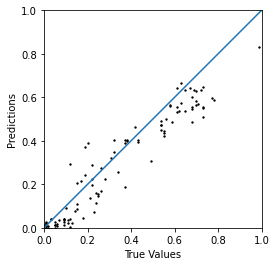

In [ ]:
plot_compare_LH(test_out_LH, test_pred_LH)
pd.DataFrame({'test_out_LH':test_out_LH,
              'test_pred_LH':test_pred_LH})

,test_out_PG,test_pred_PG
0,16.06,-667.809869
1,-9.95,-1231.726338
2,488.00,1334.609561
3,23.07,-555.240168
4,66.96,161.799486
...,...,...
150,82.11,-211.821551
151,2457.44,1256.358501
152,4846.00,2541.922687
153,13569.00,7459.246418


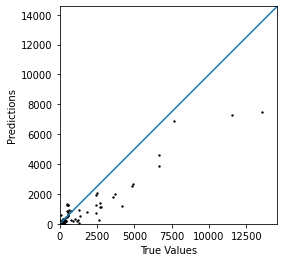

In [ ]:
plot_compare_PG(test_out_PG, test_pred_PG)
pd.DataFrame({'test_out_PG':test_out_PG,
              'test_pred_PG':test_pred_PG})